# Review 

In [1]:
import sys
sys.path.append("..")

In [2]:
import dynamics
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

## Plotting vector fields

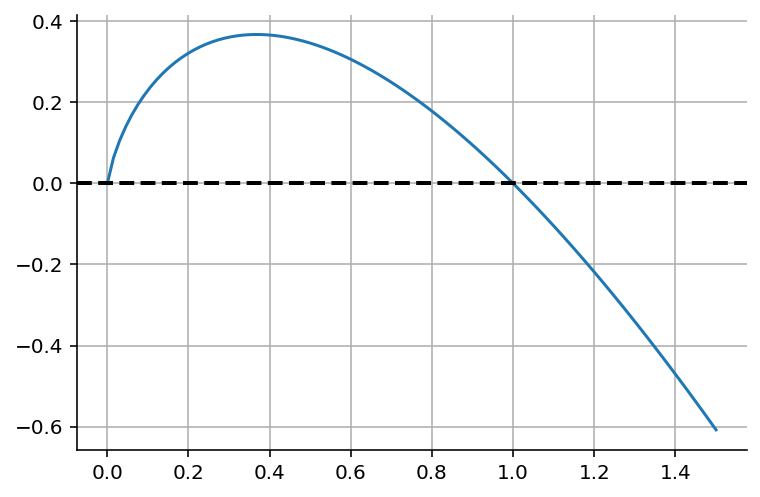

In [4]:
a, b = 1, 1
def f(N, t): return -a * N * np.log(b * N)

domain = np.linspace(1e-6, 1.5, 100)
plt.plot(domain, f(domain, 1))
plt.axhline(y=0,c="black", linestyle="--", linewidth=2)
plt.grid()

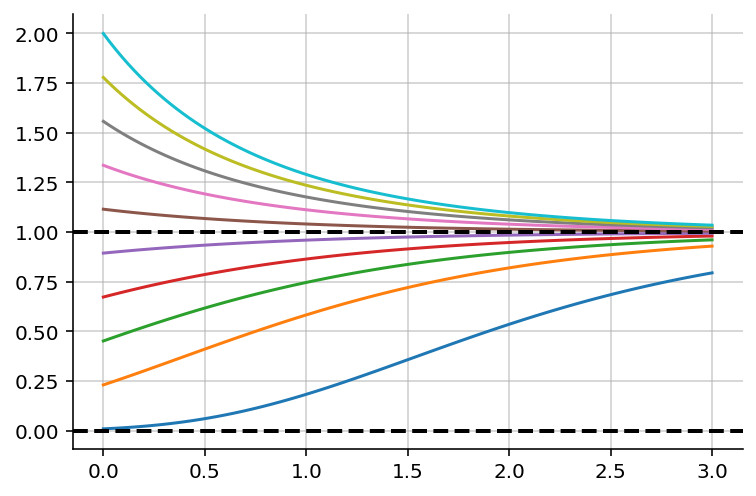

In [5]:
N0_vals = np.linspace(0.01, 2, 10)
t = np.linspace(0, 3, 100)
I = odeint(f, N0_vals, t)

plt.plot(t, I)
plt.axhline(y=0, c="black", linewidth=2, linestyle="--")
plt.axhline(y=1, c="black", linewidth=2, linestyle="--")
plt.grid(alpha=0.6)

## Chapter 4: Flows on the circle

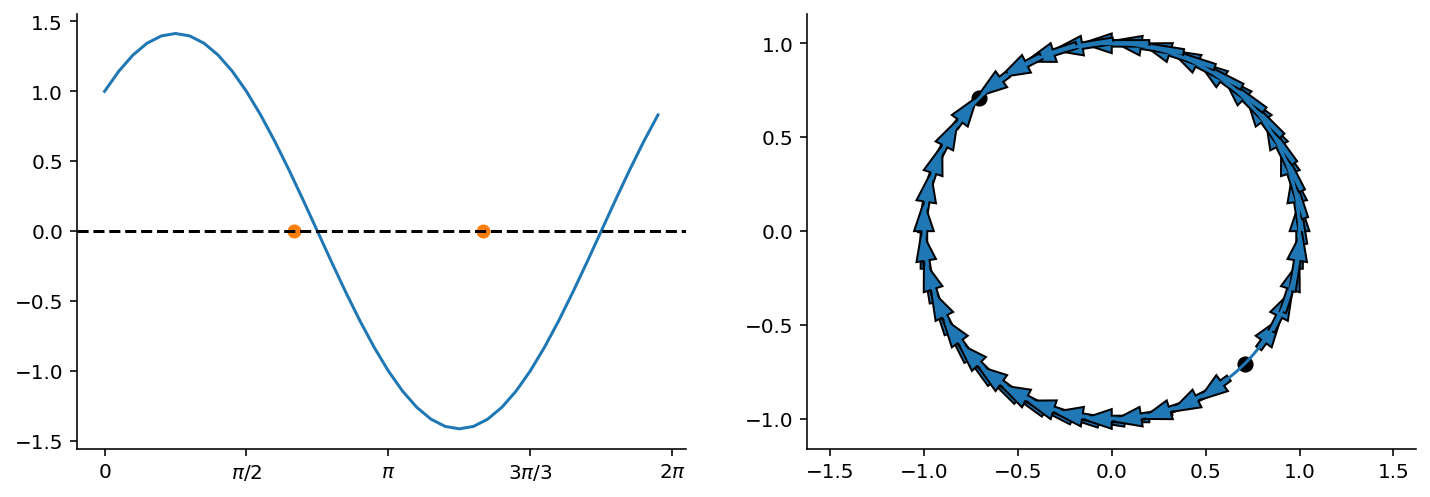

In [6]:
theta_init = np.arange(0, 2 * np.pi, np.pi / (4 * 5))

def f(θ):
    return np.sin(θ) + np.cos(θ)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

xticks = np.arange(0, 2 * np.pi + np.pi / 2, np.pi / 2)
xticks_labels = [r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi / 3$", r"$2\pi$"]
ax[0].plot(theta_init, f(theta_init))
ax[0].axhline(y=0, c="black", linestyle="--")
ax[0].scatter([2 * np.pi / 3, 4 * np.pi / 3], [0, 0], color="tab:orange")
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticks_labels)

dynamics.plot_circular_dynamics(theta_init, f, ax=ax[1])

## Chapter 6: Phase plane

In [20]:
def f(X):
    x, y = X
    xdot = 1 + y - np.exp(-x)
    ydot = x ** 3 - y
    return xdot, ydot

In [21]:
X = np.mgrid[-3:3:0.1, -3:3:0.1][::-1]

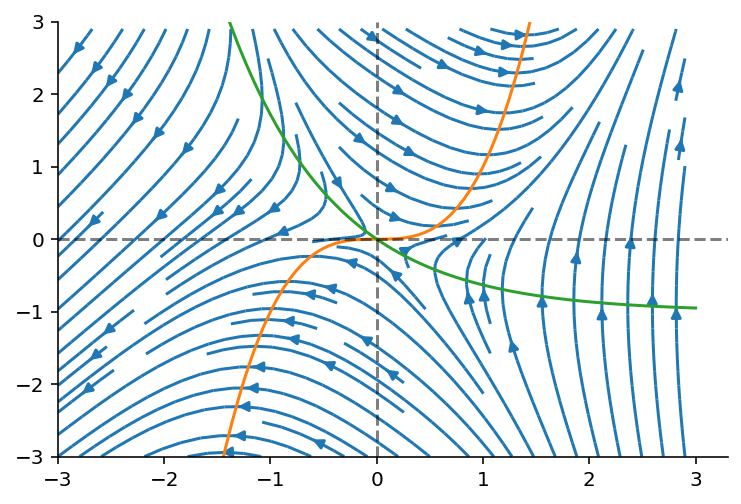

In [23]:
Xdot = np.stack(f(X))
plt.streamplot(*X, *Xdot)

xrange = np.linspace(-3, 3, 100)
plt.plot(xrange, xrange ** 3)
plt.plot(xrange, np.exp(-xrange) - 1)
plt.ylim(-3, 3)
plt.axhline(y=0, c="black", linestyle="--", alpha=0.5)
plt.axvline(x=0, c="black", linestyle="--", alpha=0.5)

## Chapter 7: limit cycles

In [25]:
def f(X):
    x, y = X
    ẋ = x - y - x * (x ** 2 + 5 * y ** 2)
    ẏ = x + y - y * (x ** 2 + y ** 2)
    return ẋ, ẏ

In [26]:
X = np.mgrid[-2:2:0.1, -2:2:0.1][::-1]
Xdot = np.stack(f(X))

In [111]:
rhat = 1.1
xrange = np.linspace(-1.5, 1.5, 500)
ymax_up = np.sqrt(rhat ** 2 - xrange ** 2)
ymax_down = -ymax_up

rhat = 0.5
ymin_up = np.sqrt(rhat ** 2 - xrange ** 2)
ymin_down = -ymin_up

<ipython-input-111-a0d5f28a3433>:3: RuntimeWarning: invalid value encountered in sqrt
  ymax_up = np.sqrt(rhat ** 2 - xrange ** 2)
<ipython-input-111-a0d5f28a3433>:7: RuntimeWarning: invalid value encountered in sqrt
  ymin_up = np.sqrt(rhat ** 2 - xrange ** 2)


(-2.0, 1.9000000000000004, -2.0, 1.9000000000000004)

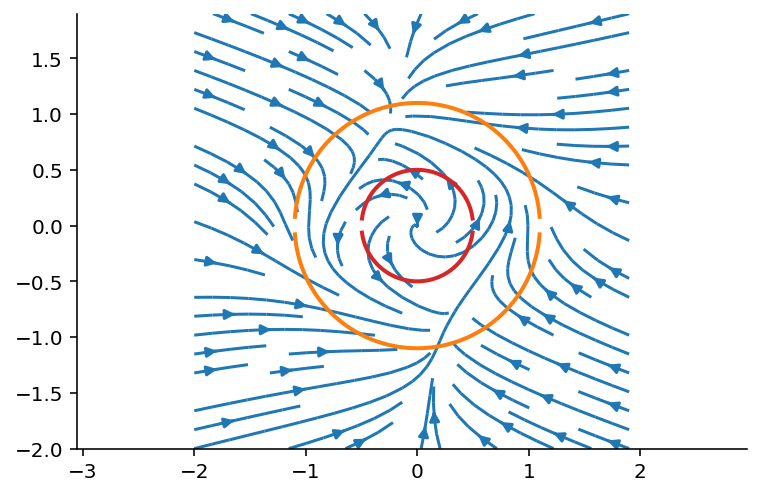

In [115]:
plt.streamplot(*X, *Xdot, density=0.8)

# Circle of maximum radius
plt.plot(xrange, ymax_up, c="tab:orange", linewidth=2)
plt.plot(xrange, ymax_down, c="tab:orange", linewidth=2)

# Circle of minimum radius

plt.plot(xrange, ymin_up, c="tab:red", linewidths=2)
plt.plot(xrange, ymin_down, c="tab:red", linewidth=2)
plt.axis("equal")